In [1]:
# import library
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

from operator import attrgetter


In [2]:
import folium
from folium.plugins import HeatMap


## LATAR BELAKANG
Laporan insiden kejahatan oleh Departemen Kepolisian Boston (BPD) untuk mendokumentasikan detail awal seputar insiden yang ditanggapi oleh kepolisian kota Boston. Data ini merupakan kumpulan data yang berisi catatan dari sistem laporan insiden kejahatan, yang mencakup kumpulan data yang difokuskan untuk menangkap jenis insiden serta kapan dan di mana itu terjadi.

## Rumusan Masalah
1. Jenis kejahatan apa yang paling banyak terjadi di kota Boston ?
2. Bagaimana cara mengurangi Insiden kejahatan di kota Boston?

## CRIME IN BOSTON 

Data Crime in Boston merupakan Data yang memuat tentang angka kriminalitas di kota Boston. Data ini memuat data kriminal dari tahun 2015-2018
pada data ini terdapat beberapa kolom yaitu
* incident number : Merupakan nomor laporan kejahatan, nomor ini merupakan id atau identitas dari sebuah laporan kriminal
* offense code : merupakan kode pelanggaran dari setiap kejahatan
* offense code group : Merupakan klasifikasi jenis kejahatan
* offense description : deskripsi dari jenis pelanggaran atau kejahatan yang terjadi
* district : Merupakan distrik yang ada di kota Boston
* Reporting Area : merupakan daerah pelaporan terjadinya kejahatan
* Shooting : Jenis kehajatan yang menggunakan senjata api
* Occured on date : merupakan tanggal dan waktu terjadinya kejahatan
* UCR_Part : merupakan klasifikasi tingkatan kejahatan
* Street : Nama Jalan tempat kejadian
* Loc (Lat,Long) : koordinat lokasi kejahatan

## Proses Analisis
Adapun dalam proses analisis kali ini yaitu meliputi :
* Cleaning data (melihat data dan merapihkan data) sehingga menjadi lebih rapih dan relevan untuk di analisis
* Analisis : Proses analisa terkait dengan topik pembahasan dengan mencari data dan visual yang sesuai dengan target analisa
* Saran dan Output : Merupakan proses akhir dari analisa yang berisi saran yang membangun untuk masalah yang ada

## Bagaimana cara mengurangi tingkat kriminalitas di Boston?
Pertanyaan diatas merupakan hal yang akan dibahas pada analisa kali ini, dimana dengan mencari kejahatan dan laporan insiden di kota boston berdasarkan
data-data yang ada, bisa dikelompokan dari waktu dan tempat serta rentan kejadian sehingga nantinya dapat dicegah dan diharapkan mengurangi angka kriminalitas di Boston sehingga menjadi kota yang aman damai, tidak menjadi Gotham City.

## DATA EXPLORATION

In [3]:
df = pd.read_csv('crime.csv', encoding='latin-1')
df.head()


INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [4]:
df['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

# Buat function untuk cek data duplikat

In [5]:
def value_count(data):

    for col in data.columns:
        print(f"{col} value counts: {data[col].value_counts().head()}")
        print("########################################################")


In [6]:
value_count(df)


INCIDENT_NUMBER value counts: I162030584    13
I152080623    11
I172013170    10
I182065208    10
I172096394    10
Name: INCIDENT_NUMBER, dtype: int64
########################################################
OFFENSE_CODE value counts: 3006    18783
3115    18754
3831    16323
1402    15154
802     14799
Name: OFFENSE_CODE, dtype: int64
########################################################
OFFENSE_CODE_GROUP value counts: Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Name: OFFENSE_CODE_GROUP, dtype: int64
########################################################
OFFENSE_DESCRIPTION value counts: SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18754
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15154
ASSAULT SIMPLE - BATTERY                 14791
Na

**Terdapat data duplikat pada incident number**

In [7]:
df.loc[df["INCIDENT_NUMBER"] == 'I162030584']


INCIDENT_NUMBER  OFFENSE_CODE         OFFENSE_CODE_GROUP  \
237660      I162030584           423         Aggravated Assault   
237661      I162030584           802             Simple Assault   
237662      I162030584          1501         Firearm Violations   
237663      I162030584          1504                      Other   
237664      I162030584          1843             Drug Violation   
237665      I162030584          2010              HOME INVASION   
237666      I162030584           371                    Robbery   
237667      I162030584          1106           Confidence Games   
237668      I162030584          1300  Recovered Stolen Property   
237669      I162030584          1510         Firearm Violations   
237670      I162030584          2660                      Other   
237671      I162030584          3125            Warrant Arrests   
237672      I162030584          3170                      Other   

                                      OFFENSE_DESCRIPTION DISTRICT  \
237660                               ASSAULT - AGGRAVATED      C11   
237661                           ASSAULT SIMPLE - BATTERY      C11   
237662      WEAPON - FIREARM - CARRYING / POSSESSING, ETC      C11   
237663                   WEAPON - OTHER - OTHER VIOLATION      C11   
237664     DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP      C11   
237665                                      HOME INVASION      C11   
237666                            ROBBERY - HOME INVASION      C11   
237667                    FRAUD - CREDIT CARD / ATM FRAUD      C11   
237668  STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING      C11   
237669                 WEAPON - FIREARM - OTHER VIOLATION      C11   
237670                                      OTHER OFFENSE      C11   
237671                                     WARRANT ARREST      C11   
237672                               INTIMIDATING WITNESS      C11   

       REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
237660            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237661            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237662            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237663            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237664            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237665            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237666            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237667            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237668            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237669            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237670            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237671            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   
237672            243      NaN  2016-04-20 11:07:00  2016      4   Wednesday   

        HOUR    UCR_PART       STREET      Lat       Long  \
237660    11    Part One  TRESCOTT ST  42.3158 -71.060521   
237661    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237662    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237663    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237664    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237665    11         NaN  TRESCOTT ST  42.3158 -71.060521   
237666    11    Part One  TRESCOTT ST  42.3158 -71.060521   
237667    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237668    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237669    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237670    11    Part Two  TRESCOTT ST  42.3158 -71.060521   
237671    11  Part Three  TRESCOTT ST  42.3158 -71.060521   
237672    11  Part Three  TRESCOTT ST  42.3158 -71.060521   

                           Location  
237660  (42.31580044, -71.06052053)  
237661  (42.31580044, -71.06052053)

Terdapat data duplikat pada incident number, yang dimana merupakan nomor dari suatu insiden yang seharusnya tidak bisa sama, bisa dilihat dari contoh diatas, bahwa nomor tersebut merupakan suatu data insiden yang sama, Dengan pasal kriminal yang berbeda

Selanjutnya dalam proses cleaning data duplikat dibersihkan supaya mendapatkan kejadian mutlak yaitu 1 kejadian 1 kode. Juga mengganti tipe data yang tidak sesuai agar mudah di proses.

In [8]:


# Convert OCCURED_ON_DATE to datetime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

# Fill in nans in SHOOTING column
df['SHOOTING'].fillna('N', inplace=True)

# Clean Duplicate
df.drop_duplicates(subset=['INCIDENT_NUMBER'], inplace=True)

# Convert DAY_OF_WEEK to an ordered category
df.DAY_OF_WEEK = pd.Categorical(df.DAY_OF_WEEK,
                                  categories=[
                                      'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)


In [9]:
value_count(df)
# Cek kembali apakah data sudah clean atau belum dari duplikat

INCIDENT_NUMBER value counts: I182070945    1
I162058038    1
I162058031    1
I162058032    1
I162058033    1
Name: INCIDENT_NUMBER, dtype: int64
########################################################
OFFENSE_CODE value counts: 3006    18474
3115    18000
3831    15838
1402    13404
802     12789
Name: OFFENSE_CODE, dtype: int64
########################################################
OFFENSE_CODE_GROUP value counts: Motor Vehicle Accident Response    35447
Larceny                            24454
Medical Assistance                 23029
Investigate Person                 17999
Other                              14002
Name: OFFENSE_CODE_GROUP, dtype: int64
########################################################
OFFENSE_DESCRIPTION value counts: SICK/INJURED/MEDICAL - PERSON            18474
INVESTIGATE PERSON                       18000
M/V - LEAVING SCENE - PROPERTY DAMAGE    15838
VANDALISM                                13404
ASSAULT SIMPLE - BATTERY                 12787
Name: O

**Data Incident_Number sudah clean yang menandakan data sudah bersih dari laporan duplikat**

Pada tahapan selanjutnya kolom di rename supaya menjadi lebih mudah diingat. serta drop kolom yang tidak digunakan.

In [10]:
# Rename columns (biar gampang)
rename = {'OFFENSE_CODE_GROUP': 'Group',
          'OFFENSE_DESCRIPTION': 'Description',
          'DISTRICT': 'District',
          'REPORTING_AREA': 'Area',
          'SHOOTING': 'Shooting',
          'OCCURRED_ON_DATE': 'Date',
          'YEAR': 'Year',
          'MONTH': 'Month',
          'DAY_OF_WEEK': 'Day',
          'HOUR': 'Hour',
          'STREET': 'Street'}
df.rename(index=str, columns=rename, inplace=True)

# Remove unused columns
df = df.drop(['OFFENSE_CODE',
'Location'], axis=1)


In [11]:
df.head()

INCIDENT_NUMBER                 Group           Description District Area  \
0      I182070945               Larceny    LARCENY ALL OTHERS      D14  808   
1      I182070943             Vandalism             VANDALISM      C11  347   
2      I182070941                 Towed   TOWED MOTOR VEHICLE       D4  151   
3      I182070940  Investigate Property  INVESTIGATE PROPERTY       D4  272   
4      I182070938  Investigate Property  INVESTIGATE PROPERTY       B3  421   

  Shooting                Date  Year  Month      Day  Hour    UCR_PART  \
0        N 2018-09-02 13:00:00  2018      9   Sunday    13    Part One   
1        N 2018-08-21 00:00:00  2018      8  Tuesday     0    Part Two   
2        N 2018-09-03 19:27:00  2018      9   Monday    19  Part Three   
3        N 2018-09-03 21:16:00  2018      9   Monday    21  Part Three   
4        N 2018-09-03 21:05:00  2018      9   Monday    21  Part Three   

        Street        Lat       Long  
0   LINCOLN ST  42.357791 -71.139371  
1     HECLA ST  42.306821 -71.060300  
2  CAZENOVE ST  42.346589 -71.072429  
3   NEWCOMB ST  42.334182 -71.078664  
4     DELHI ST  42.275365 -71.090361

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282517 entries, 0 to 319072
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   INCIDENT_NUMBER  282517 non-null  object        
 1   Group            282517 non-null  object        
 2   Description      282517 non-null  object        
 3   District         280934 non-null  object        
 4   Area             282517 non-null  object        
 5   Shooting         282517 non-null  object        
 6   Date             282517 non-null  datetime64[ns]
 7   Year             282517 non-null  int64         
 8   Month            282517 non-null  int64         
 9   Day              282517 non-null  category      
 10  Hour             282517 non-null  int64         
 11  UCR_PART         282463 non-null  object        
 12  Street           273249 non-null  object        
 13  Lat              265313 non-null  float64       
 14  Long             265313 n

In [13]:
# ubah tipe data kategorikal menjadi Category

df.Group = df.Group.astype('category')
df.Description = df.Description.astype('category')
df.UCR_PART = df.UCR_PART.astype('category')
df.District = df.District.astype('category')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282517 entries, 0 to 319072
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   INCIDENT_NUMBER  282517 non-null  object        
 1   Group            282517 non-null  category      
 2   Description      282517 non-null  category      
 3   District         280934 non-null  category      
 4   Area             282517 non-null  object        
 5   Shooting         282517 non-null  object        
 6   Date             282517 non-null  datetime64[ns]
 7   Year             282517 non-null  int64         
 8   Month            282517 non-null  int64         
 9   Day              282517 non-null  category      
 10  Hour             282517 non-null  int64         
 11  UCR_PART         282463 non-null  category      
 12  Street           273249 non-null  object        
 13  Lat              265313 non-null  float64       
 14  Long             265313 n

# Analysis and Visual

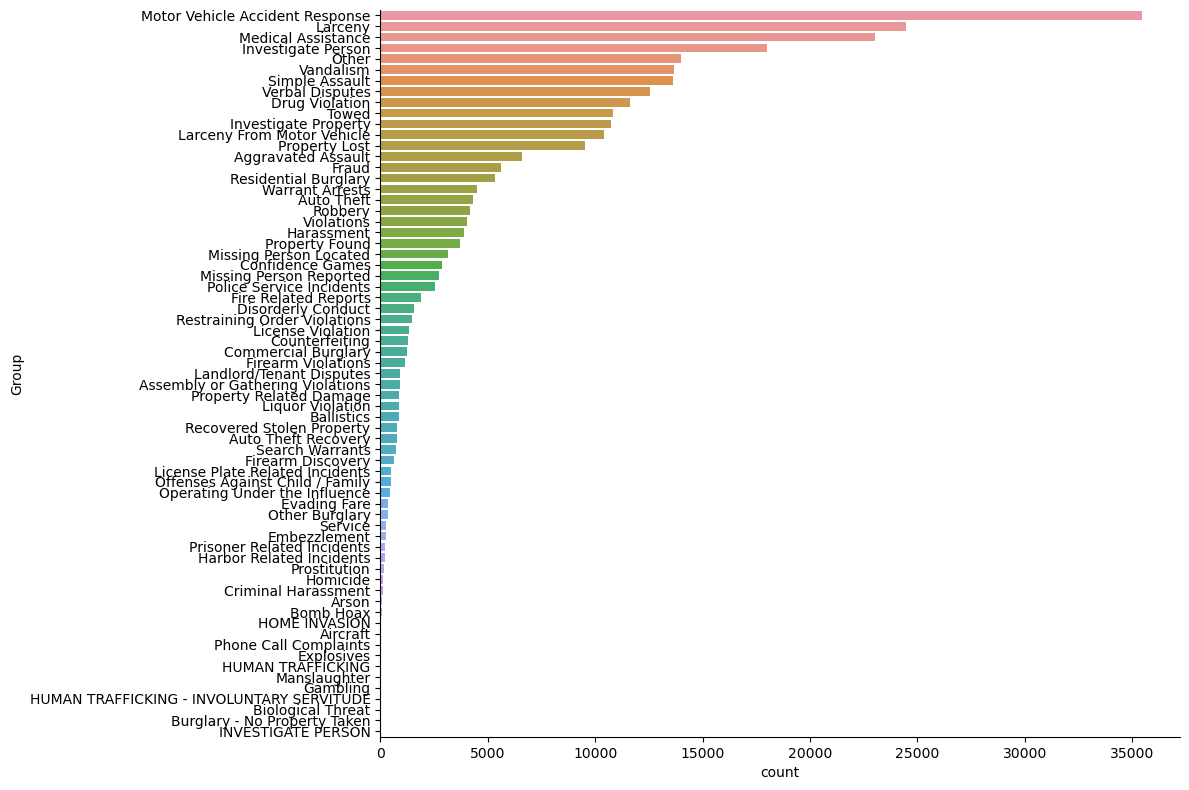

In [15]:
# Jenis Kejahatan
# Countplot for crime types
sns.catplot(y='Group',
            kind='count',
            height=8,
            aspect=1.5,
            order=df.Group.value_counts().index,
            data=df)

plt.show()


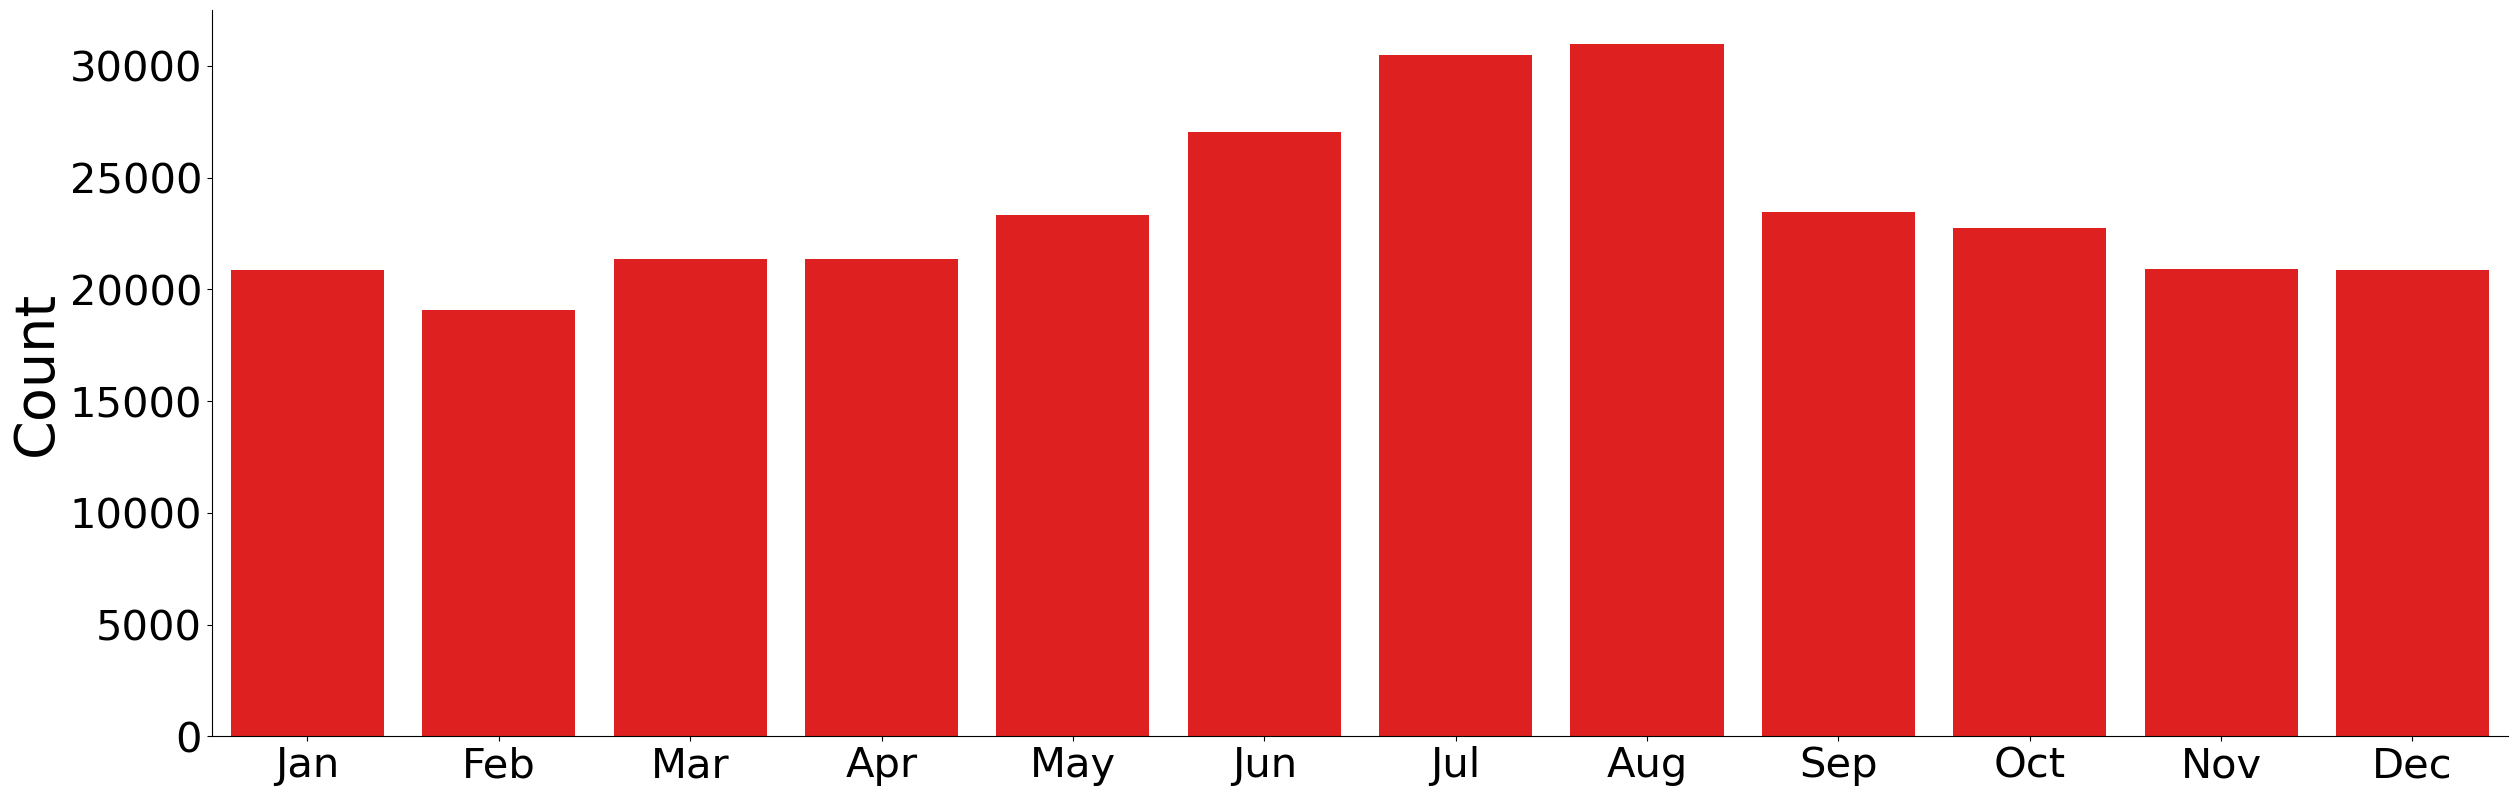

In [16]:
# Crimes by month of year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.catplot(x='Month',
            kind='count',
            height=8,
            aspect=3,
            color='red',
            data=df)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

plt.show()


## Cek sebaran kriminalitas dengan scatter plot district

In [17]:
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)


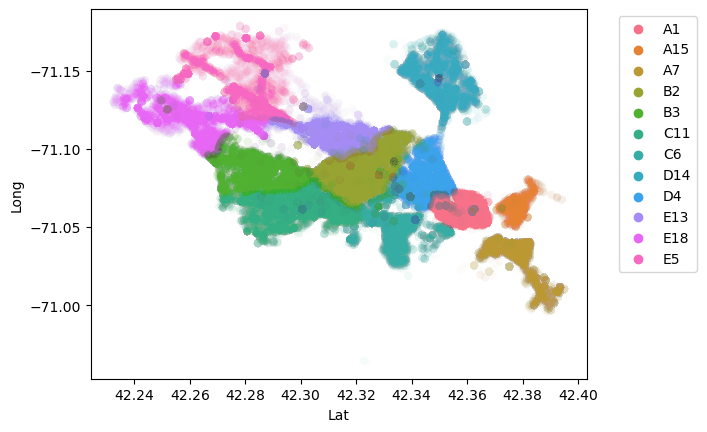

In [18]:
sns.scatterplot(x='Lat',
                y='Long',
                hue='District',
                alpha=0.01,
                data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


## Visualisasi menggunakan HeatMap Folium

In [19]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.3125, -71.0875],
                       tiles="Stamen Toner",
                       zoom_start=11)

# Add data for heatmap
data_heatmap = df[df.Year == 2017]
data_heatmap = df[['Lat', 'Long']]
data_heatmap = df.dropna(axis=0, subset=['Lat', 'Long'])
data_heatmap = [[row['Lat'], row['Long']]
                for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)


crime_map



## Membuat TreeMap jumlah kejahatan dengan plotly

In [20]:
from plotly.subplots import make_subplots
import datetime
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)


In [21]:
def treemap(categories, title, path, values):
    fig = px.treemap(categories, path=path, values=values, height=700,
                     title=title, color_discrete_sequence=px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()


In [22]:
Number_crimes = df['Group'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index,
                          columns=["Group"])
categories['values'] = values


In [23]:
treemap(categories,'Major Crimes in Boston',['Group'],categories['values'])

c:\Users\zenio\anaconda3\lib\site-packages\plotly\express\_core.py:1594: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


In [25]:
# membuat kolom baru sebagai klasifikasi
df["Quarter"] = df["Date"].dt.quarter
df["Weekofyear"] = df["Date"].dt.isocalendar().week

# Convert into categorical data type
df["Quarter"] = df["Quarter"].astype("category")
df["Weekofyear"] = df["Weekofyear"].astype("category")


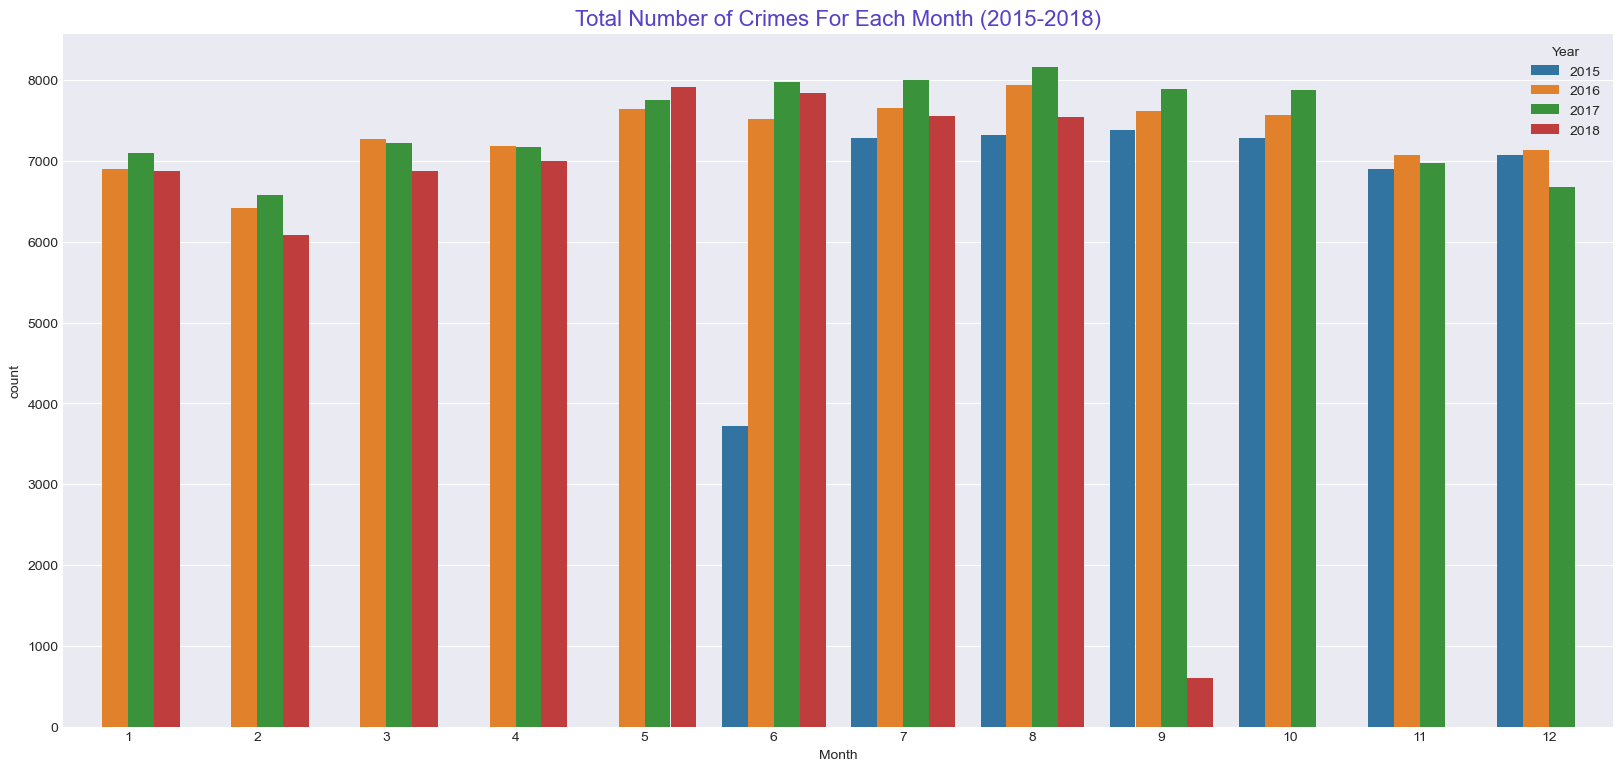

In [26]:
# Set plot parameters
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(20,9))

sns.countplot(x="Month", hue="Year", data=df)
plt.title("Total Number of Crimes For Each Month (2015-2018)",
          fontsize=16, color="#5642C5")
loc='best'

plt.show()

**Pada plot dapat dlihat bahwa data 2015 start dari bulan Juni dan data tahun 2018 hanya sampai September dan 2017 menjadi worst year dengan jumlah tertinggi**

## Visualisasi area top 3 crime dengan countplot

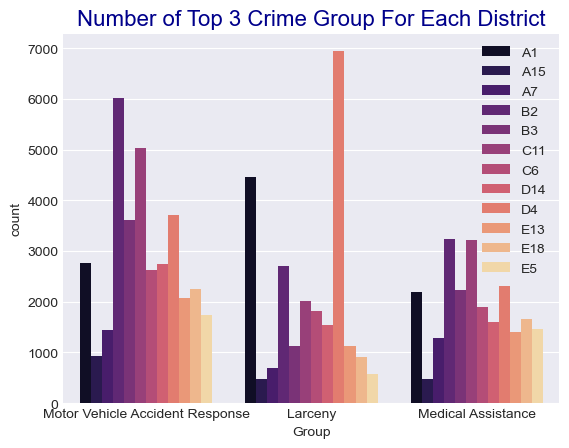

In [27]:
order = df['Group'].value_counts().head(3).index
sns.countplot(data=df, x="Group", hue="District", order=order,palette='magma')
plt.title("Number of Top 3 Crime Group For Each District",
          fontsize=16, color="#00008B")
plt.legend(loc='best')
plt.show()



**Berikut merupakan visualisasi dari top 3 accident yang dikelompokan berdasarkan distrik**

Pada distrik B2&C11 didapatkan fakta bahwa kecelakaan kendaraan bermotor terjadi sangat banyak di daerah tersebut

sedangka pada perampokan berkelompok terjadi paling banyak pada district D4

Dan medical assistance yang plaing banyak juga terdapat di B2&C11

## mencari sebaran kejahatan berdasarkan tahun, hari dan jam

In [38]:
# Specifying the values to plot (year, month, day, hour, district, street) for NOC= number of Crime
noc_year = pd.DataFrame(data = df["Year"].value_counts().reset_index().values,
                        columns = ["year", "noc"]).sort_values("year").reset_index(drop = True)
noc_month = pd.DataFrame(data = df["Month"].value_counts().reset_index().values,
                        columns = ["month", "noc"]).sort_values("month").reset_index(drop = True)
noc_day = pd.DataFrame(data = df["Day"].value_counts().reset_index().values,
                        columns = ["day", "noc"]).sort_values("day").reset_index(drop = True)
noc_hour = pd.DataFrame(data = df["Hour"].value_counts().reset_index().values,
                        columns = ["hour", "noc"]).sort_values("hour").reset_index(drop = True)


# Create a subplot with 3 rows and 2 cols
fig = make_subplots(rows = 2, cols = 2,
                   specs = [[{"type" : "scatter"}, {"type" : "scatter"}], [{"type" : "scatter"},
                             {"type" : "scatter"}]],
                   subplot_titles = ("NOC per Year", "NOC per Month", "NOC per Day", "NOC per Hour"))

# Plot the values
fig.add_trace(go.Scatter(x = noc_year["year"],
                        y = noc_year["noc"]), row = 1, col = 1)
fig.add_trace(go.Scatter(x = noc_month["month"],
                        y = noc_month["noc"]), row = 1, col = 2)
fig.add_trace(go.Scatter(x = noc_day["day"],
                        y = noc_day["noc"]), row = 2, col = 1)
fig.add_trace(go.Scatter(x = noc_hour["hour"],
                        y = noc_hour["noc"]), row = 2, col = 2)


# Update x axes parameters
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Month", range=[0, 13], row=1, col=2)
fig.update_xaxes(title_text="Day", row=2, col=1)
fig.update_xaxes(title_text="Hour",row=2, col=2)


# Update y axes parameters
fig.update_yaxes(title_text="Crime Count", row=1, col=1)
fig.update_yaxes(title_text="Crime Count",row=1, col=2)
fig.update_yaxes(title_text="Crime Count", row=2, col=1)
fig.update_yaxes(title_text="Crime Count", row=2, col=2)


fig.update_layout(showlegend=False,title_text="Distribusi Angka Kejahatan 2015-2018", height=900)

## Pada Quarter tahun dikelompokan menjadi 4 setiap quarter merepresentasikan 3 bulan, sebagai acuan dari musim di Boston

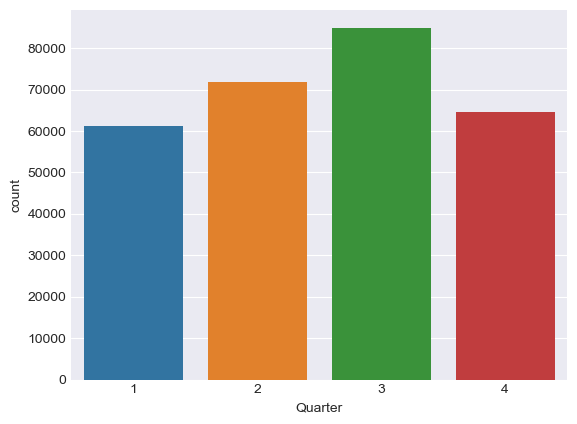

In [29]:
sns.countplot(x="Quarter", data=df)
plt.show()

kejahatan paling banyak terjadi pada kuarter ke 3 atau musim summer pada saat musim libur

## Kenaikan Kelas Kejahatan dari tahun ke tahun

In [30]:
ucr_year = pd.DataFrame(data=(df.groupby(["Year", "UCR_PART"]).count()[['Group']]).reset_index().values,
                        columns=["year", "ucr_part", "noc"]).sort_values('year').reset_index(drop=True)

px.bar(ucr_year, x="year", y="noc", color="ucr_part",
       title="UCR per Tahun", text="noc")


In [31]:
fig = px.line(ucr_year, x="year", y="noc", color="ucr_part", labels={"noc": "Number of Crime",
                                                                     "year": "Year",
                                                                     "ucr_part": "UCR Part"}, title="UCRs per Year")

fig.update_layout(
    font_color="#5642C5",
    title_font_color="#5642C5",
    legend_title_font_color="#5642C5",
    font_size=14
)


Kejahatan paling banyak adalah dari kelas 3, kejahatan serius atau kelas 1 cenderung sedikit, hal ini merupakan sesuatu yang bagus, karena masih mungkin untuk dicegah. Dengan penempatan sumberdaya dan kerja dari kepolisian Boston

In [39]:
ucr_hour = pd.DataFrame(data=(df.groupby(["Hour", "UCR_PART"]).count()["Group"]).reset_index().values,
                        columns=["hour", "ucr part", "noc"]).sort_values("hour").reset_index(drop=True)

fig4 = px.bar(ucr_hour, x="hour", y="noc", color="ucr part", title="UCRs per Hour (Figure 1)",
              labels={"noc": "Number of Crime",
                      "hour": "Hour",
                      "ucr part": "UCR PART"}, text="noc", color_discrete_sequence=["red", "LightSeaGreen", "DarkCyan", "DarkSeaGreen"])

fig4.update_traces(textposition="outside")
fig4.update_layout(
    font_color="#5642C5",
    title_font_color="#5642C5",
    legend_title_font_color="#5642C5",
    font_size=14)


**Waktu kejahatan di Boston cenderung merata pada setiap kelas, yaitu pada jam sibuk dimulai dari jam 10 sampai puncaknya pada jam 17**

## NoC of Street and District

In [34]:
fig6 = make_subplots(rows=2, cols=1, specs=[[{"type": "bar"}], [{"type": "bar"}]],
                     subplot_titles=("Number of Crime per Street", "Number of Crime per District"))

fig6.add_trace(go.Bar(x=noc_street["street"],
               y=noc_street["noc"]), row=1, col=1)
fig6.add_trace(go.Bar(x=noc_dist["dist"], y=noc_dist["noc"]), row=2, col=1)


## Review & Analisis

Berdasarkan data analisis diatas didapatkan fakta sebagai berikut :
* Laporan pelanggaran paling banyak di Boston adalah kecelakaan kendaraan bermotor diikuti dengan perampokan bersenjata dan bantuan medis
* 2017 merupakan tahun dengan insiden paling banyak diantara tahun lainnya 2018 cenderung menurun dan menunjukan tren yang positif
* Jika dilihat berdasarkan waktu :
  * Bulan atau musim terjadinya banyak kejahatan adalah pada musim Summer yaitu antara bulai mei-agustus
  * Hari Jumat merupakan hari dengan laporan kriminal paling banyak, hal ini bisa diasumsikan dengan hari terakhir kerja, dimana peluang kejahatan sangat tinggi pada hari ini, hari minggu menurun dengan tajam, hari terakhir weekend.
  * Jam kejadian favourite kejahatan adalah di jam-jam sibuk yaitu antara 10-20 dengan puncaknya terjadi di jam 17
* Klasifikasi jenis kejahatan yang paling sering terjadi di boston adalah kejahatan atau insiden kelas 3, dimana ini merupakan jenis pelanggaran ringan dan tidak berat

## Saran

* Mengingat tingginya jenis laporan kecelakaan di boston, hal ini sangat dapat dikurangi dengan perbaikan sistem dan alokasi sumberdaya di jam-jam rawan kecelakaan dan jalan-jalan terjadinya kecelakaan, pihak kepolisian juga dapat memperketat aturan serta pengeluaran surat izin mengemudi.
* Memperketat keamanan pada jam-jam sibuk dan musim liburan. karena waktu terjadinya dan paling banyak pada jam-jam sibuk bukan tengah malam yang dimana hal ini sangat dapat dicegah.
  